In [1]:
# keras mnist practice 手寫模型練習
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils # one-hot-encoder 功能
from matplotlib import pyplot as plt
import os
np.random.seed(12345)

Using TensorFlow backend.
C:\Users\kplus\anaconda3\envs\myenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kplus\anaconda3\envs\myenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kplus\anaconda3\envs\myenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kplus\anaconda3\envs\myenv36\lib

In [2]:
# import mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

shape: (28, 28)


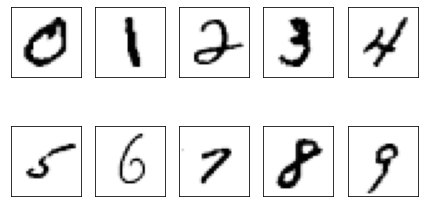

In [22]:
print('shape:', X_train[0].shape)

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train==i][1]
    ax[i].imshow(img, 'Greys')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()  # 自動調整圖距
plt.show()


In [4]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [5]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [6]:
# create simple sequential model 
model = Sequential()
# Add input layer
# unit:0~255顏色位元 也可以取128,512等, input_dim:input_image 28*28=784, RandomUniform:均勻分布
model.add(Dense(units=256, input_dim=784, kernel_initializer='RandomUniform', activation='relu'))

# Add output layer
# unit:0~9 numbers, softmax:有機率的分類，各個分類機率總和為1
model.add(Dense(units=10, kernel_initializer='RandomUniform', activation='softmax', use_bias=False))

# compile 編譯:chose loss fuction, optimizer, metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# One-hot-encoder (label)
y_trainOnehot = np_utils.to_categorical(y_train)
y_testOnehot = np_utils.to_categorical(y_test)
print(y_train[0], '→', y_trainOnehot[0])

5 → [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
print(X_train.shape, '3D \n', y_trainOnehot.shape, '2D')

(60000, 28, 28) 3D 
 (60000, 10) 2D


In [9]:
# X:'input' to 2D
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')

# normalize (因為輸出結果為0~1的機率，輸入先歸一化)
X_train_norm = X_train_2D / 255
X_test_norm = X_test_2D / 255

# 訓練模型 verbose=2 逐行紀錄訓練過程
train_history = model.fit(x=X_train_norm, y=y_trainOnehot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)

# Scores
scores = model.evaluate(X_test_norm, y_testOnehot)
print('')
print('[Info]\t loss value = {:2.2f}%'.format(scores[0]*100))
print('\t Accuracy of testing data = {:2.2f}%'.format(scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.8897 - acc: 0.8078 - val_loss: 0.3400 - val_acc: 0.9054
Epoch 2/10
 - 1s - loss: 0.3186 - acc: 0.9099 - val_loss: 0.2607 - val_acc: 0.9275
Epoch 3/10
 - 1s - loss: 0.2508 - acc: 0.9299 - val_loss: 0.2179 - val_acc: 0.9416
Epoch 4/10
 - 1s - loss: 0.2075 - acc: 0.9417 - val_loss: 0.1871 - val_acc: 0.9483
Epoch 5/10
 - 2s - loss: 0.1749 - acc: 0.9507 - val_loss: 0.1638 - val_acc: 0.9549
Epoch 6/10
 - 2s - loss: 0.1513 - acc: 0.9576 - val_loss: 0.1511 - val_acc: 0.9573
Epoch 7/10
 - 1s - loss: 0.1313 - acc: 0.9632 - val_loss: 0.1361 - val_acc: 0.9610
Epoch 8/10
 - 2s - loss: 0.1161 - acc: 0.9676 - val_loss: 0.1262 - val_acc: 0.9648
Epoch 9/10
 - 2s - loss: 0.1036 - acc: 0.9716 - val_loss: 0.1189 - val_acc: 0.9668
Epoch 10/10
 - 2s - loss: 0.0934 - acc: 0.9743 - val_loss: 0.1123 - val_acc: 0.9674
10000/10000 [==============================] - 0s 49us/step

[Info]	 lo

In [10]:
# 訓練過程趨勢圖
# plt.plot(train_history.history['acc'])
# plt.plot(train_history.history['val_acc'])
# plt.title('train_history_acc')
# plt.ylabel('acc')
# plt.xlabel('Epoch')
# plt.legend(['train', 'validation'])
# plt.show()

In [11]:
def show_train_history(train_history, train, validation, title):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(title)
    plt.ylabel('acc')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'])
    plt.show()

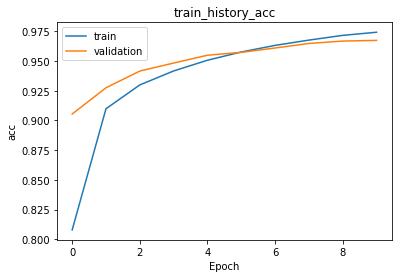

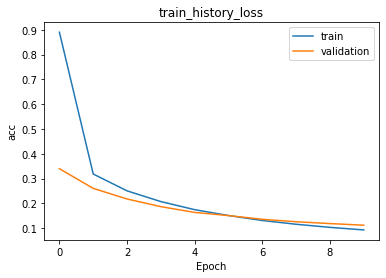

In [12]:
# acc
show_train_history(train_history, 'acc', 'val_acc', title='train_history_acc')
# loss
show_train_history(train_history, 'loss', 'val_loss', title='train_history_loss')


In [13]:
y_pred = model.predict_classes(X_test_norm)
print('prediction :', y_pred[-20:])
print('actual     :', y_test[-20:])
# 倒數18預測錯誤

prediction : [2 6 6 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6]
actual     : [2 6 5 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6]


In [14]:
# take a look 18th from the bottom
print(model.predict(X_test_norm)[-18])

[1.1260796e-03 1.1016086e-03 1.7616432e-02 2.2189087e-01 1.8068757e-04
 2.7645238e-02 7.2344166e-01 1.5504822e-03 4.7389539e-03 7.0803432e-04]


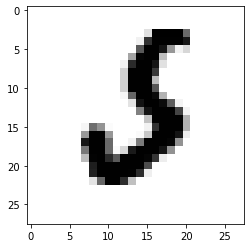

In [15]:
plt.imshow(X_test[-18], cmap='Greys')
plt.show()

In [16]:
# true(rows)  pred(cols)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(matrix)

[[ 964    0    1    2    0    5    5    2    1    0]
 [   0 1122    4    0    0    1    4    0    4    0]
 [   4    1 1001    5    3    1    5    5    7    0]
 [   0    0    6  986    0    5    0    4    7    2]
 [   1    0    4    1  949    0    7    2    2   16]
 [   4    1    0   10    1  854    9    2    7    4]
 [   5    3    1    1    6    7  930    0    5    0]
 [   0   11   12    7    2    1    0  981    1   13]
 [   3    0    4   12    3    5    5    3  936    3]
 [   3    7    2   13   12    2    1    5    3  961]]


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2560      
Total params: 203,520
Trainable params: 203,520
Non-trainable params: 0
_________________________________________________________________


In [18]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [19]:
# save config 
model_json = model.to_json()
with open('model.config', 'w') as txt:
    txt.write(model_json)
    
# save weight
model.save_weights('model.weights')

# save model
model.save('model.h5')